# **Speed Dating avec Tinder**

## Partie 1 : Import des library, du dataset et premiers preprocessings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [5]:
dataset = pd.read_csv("Speed_Dating_Data.csv", encoding="Latin-1")
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [6]:
dataset.shape

(8378, 195)

L'objectif des études de variable suivantes est de regarder si des corrélations peuvent être observées entre certaines variables et le match, dépendamment ou indépendamment du sexe du candidat.

Première chose : pour que ce soit plus clair, pour la variable gender, on va changer dans notre dataset tous les 0 par Female et tous les 1 par Male.

In [7]:
dataset_copy = dataset.copy()

In [8]:
dataset_copy['gender'].loc[dataset_copy['gender'] == 0] = 'Female'
dataset_copy['gender'].loc[dataset_copy['gender'] == 1] = 'Male'
dataset_copy.head()

C:\Users\Théo REMY\AppData\Local\Temp\ipykernel_5932\411007464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['gender'].loc[dataset_copy['gender'] == 0] = 'Female'
C:\Users\Théo REMY\AppData\Local\Temp\ipykernel_5932\411007464.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_copy['gender'].loc[dataset_copy['gender'] == 0] = 'Female'


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,Female,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0

Deuxième chose : pour que ce soit plus clair, pour la variable match, on va créer une nouvelle colonne 'explicit_match' qui vaut Yes si 'match' = 1 et No si 'match' = 0

In [9]:
dataset_copy['explicit_match'] = ['No' for i in range(dataset_copy.shape[0])]
dataset_copy['explicit_match'].loc[dataset_copy['match'] == 1] = 'Yes'
dataset_copy['explicit_match'].head()

C:\Users\Théo REMY\AppData\Local\Temp\ipykernel_5932\879093789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['explicit_match'].loc[dataset_copy['match'] == 1] = 'Yes'


0     No
1     No
2    Yes
3    Yes
4    Yes
Name: explicit_match, dtype: object

## Partie 2 : Exploration et visualisation de variables

Comme il y a beaucoup de variables dans ce dataset, j'ai selectionné une liste de variables qui semblait intéressantes à étudier et cohérentes avec notre sujet.

### Variable order

Text(0.5, 1.0, 'Répartition du numéro des date en fonction du match')

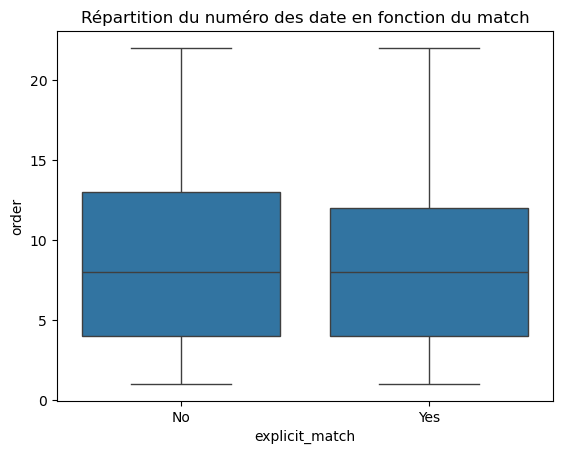

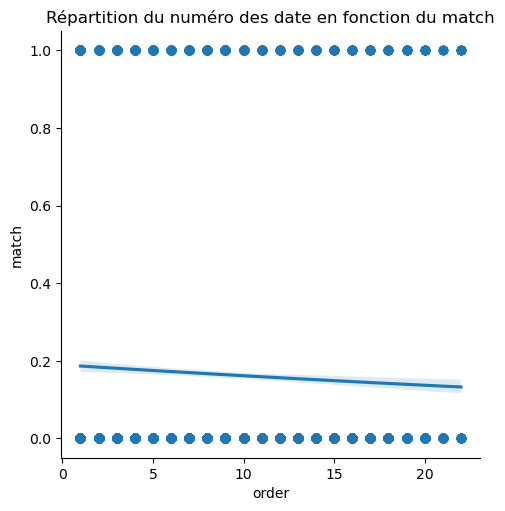

In [10]:
sns.boxplot(data=dataset_copy, x='explicit_match', y='order')
plt.title("Répartition du numéro des date en fonction du match")

sns.lmplot(x='order', y='match', data = dataset_copy, logistic=True)
plt.title("Répartition du numéro des date en fonction du match")

Résultats : aucune corrélation

### Variable int_corr

Text(0.5, 1.0, "Répartition de la corrélation des centres d'intérêts commun en fonction du match")

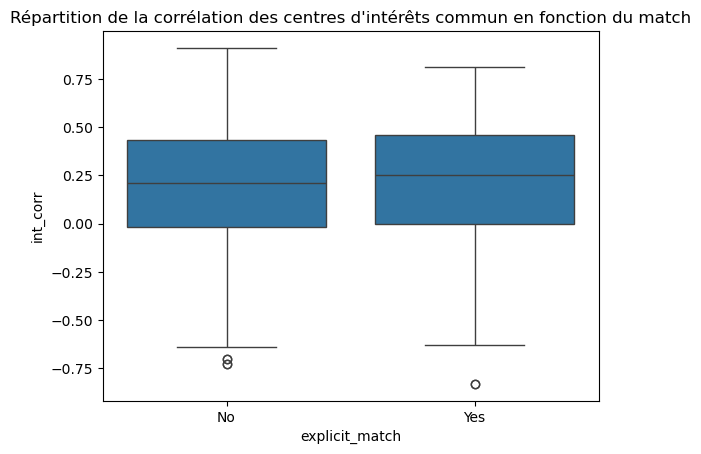

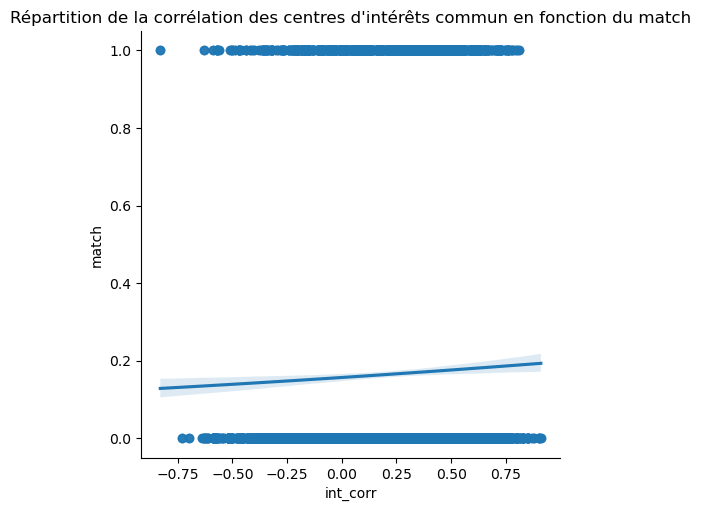

In [11]:
sns.boxplot(data=dataset_copy, x='explicit_match', y='int_corr')
plt.title("Répartition de la corrélation des centres d'intérêts commun en fonction du match")

sns.lmplot(x='int_corr', y='match', data = dataset_copy, logistic=True)
plt.title("Répartition de la corrélation des centres d'intérêts commun en fonction du match")

Résultats : aucune corrélation

### Variable samerace

In [12]:
# On va changer les 0 par 'Origines éthniques différentes' et les 1 par 'Origines éthniques communes'
dataset_copy['samerace'].loc[dataset_copy['samerace'] == 0] = 'No'
dataset_copy['samerace'].loc[dataset_copy['samerace'] == 1] = 'Yes'
dataset_copy.head()

C:\Users\Théo REMY\AppData\Local\Temp\ipykernel_5932\3264216355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy['samerace'].loc[dataset_copy['samerace'] == 0] = 'No'
C:\Users\Théo REMY\AppData\Local\Temp\ipykernel_5932\3264216355.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset_copy['samerace'].loc[dataset_copy['samerace'] == 0] = 'No'


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,explicit_match
0,1,1.0,Female,1,1,1,10,7,NaN,4,1,11.0,0,0.14,No,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,No
1,1,1.0,Female,1,1,1,10,7,NaN,3,2,12.0,0,0.54,No,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,No
2,1,1.0,Female,1,1,1,10,7,NaN,10,3,13.0,1,0.16,Yes,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes
3,1,1.0,Female,1,1,1,10,7,NaN,5,4,14.0,1,0.61,No,23.0,

On va calculer les proportions de 'samerace = No' et 'samerace = Yes' par rapport au nombre total de 'match = No' et 'match = Yes'

In [13]:
nb_samerace = dataset_copy.groupby(by=['match', 'samerace'])[['iid']].count()
nb_samerace

iid
match samerace      
0     No        4248
      Yes       2750
1     No         814
      Yes        566

In [14]:
nb_total_no_match = nb_samerace.iloc[0,0] + nb_samerace.iloc[1,0]
nb_total_match = nb_samerace.iloc[2,0] + nb_samerace.iloc[3,0]
for i in range(2):
    nb_samerace.iloc[i,0] = nb_samerace.iloc[i,0]/nb_total_no_match

for i in range(2,4):
    nb_samerace.iloc[i,0] = nb_samerace.iloc[i,0]/nb_total_match

nb_samerace = nb_samerace.rename(columns={'iid':'proportion'})
nb_samerace

C:\Users\Théo REMY\AppData\Local\Temp\ipykernel_5932\62805091.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6070305801657616' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  nb_samerace.iloc[i,0] = nb_samerace.iloc[i,0]/nb_total_no_match


proportion
match samerace            
0     No          0.607031
      Yes         0.392969
1     No          0.589855
      Yes         0.410145

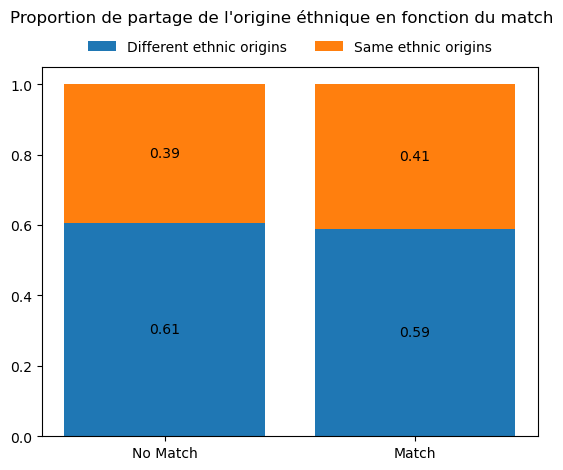

In [15]:
# Affichons cela avec un diagramme en barre emplié
list_names_match = ['No Match', 'Match']
plt.bar(list_names_match, [nb_samerace.iloc[0,0], nb_samerace.iloc[2,0]])
plt.bar(list_names_match, [nb_samerace.iloc[1,0], nb_samerace.iloc[3,0]], bottom=[nb_samerace.iloc[0,0], nb_samerace.iloc[2,0]])

plt.legend(['Different ethnic origins', 'Same ethnic origins'], loc='lower center', bbox_to_anchor=(0.5,1), ncol=2, title=None, frameon=False)

plt.suptitle("Proportion de partage de l'origine éthnique en fonction du match", y=1)

plt.text(
    list_names_match[0], 
    nb_samerace.iloc[0,0]/2, 
    nb_samerace.iloc[0,0].round(2), 
    horizontalalignment='center', 
    verticalalignment='center'
    )

plt.text(
    list_names_match[0], 
    nb_samerace.iloc[1,0]/2 + nb_samerace.iloc[0,0], 
    nb_samerace.iloc[1,0].round(2), 
    horizontalalignment='center', 
    verticalalignment='center'
    )

plt.text(
    list_names_match[1], 
    nb_samerace.iloc[2,0]/2, 
    nb_samerace.iloc[2,0].round(2), 
    horizontalalignment='center', 
    verticalalignment='center'
    )

plt.text(
    list_names_match[1], 
    nb_samerace.iloc[3,0]/2 + nb_samerace.iloc[2,0], 
    nb_samerace.iloc[3,0].round(2), 
    horizontalalignment='center', 
    verticalalignment='center'
    )

plt.show()

Résultats : aucune corrélation

### Variables age et age_0

In [16]:
dataset_copy['age'].value_counts()

age
27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
28.0     746
22.0     655
29.0     589
30.0     574
21.0     291
32.0     210
33.0     161
34.0     152
31.0     125
35.0      60
20.0      55
36.0      45
19.0      20
42.0      20
38.0      19
39.0      18
18.0      10
55.0       6
37.0       5
Name: count, dtype: int64

Text(0.5, 1.0, 'Répartition des âges des participants en fonction du match')

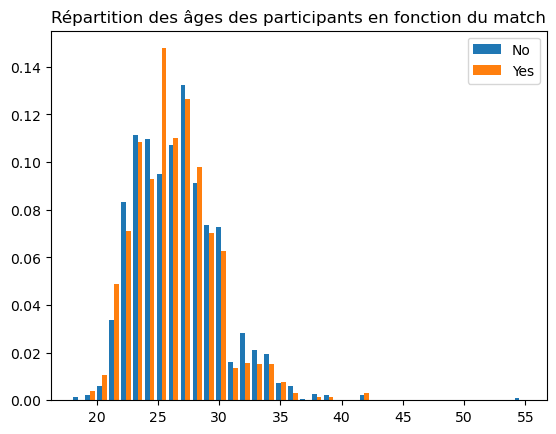

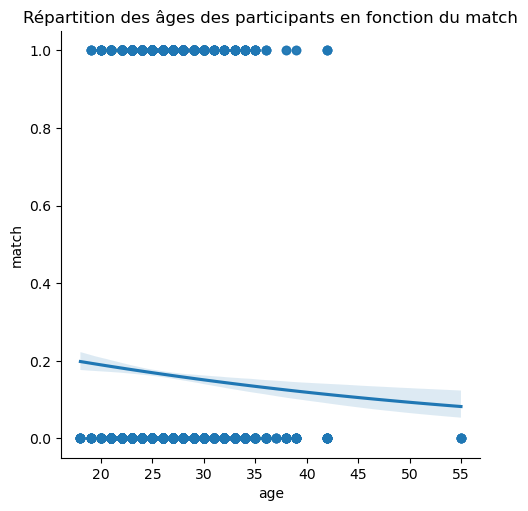

In [17]:
# Regardons la répartition des âges en fonction du match
plt.hist([dataset_copy['age'].loc[dataset_copy['explicit_match'] == 'No'], dataset_copy['age'].loc[dataset_copy['explicit_match'] == 'Yes']], bins=38, density=True) # On choisit bins=38 puisque les âges vont de 18 à 55 ans.
plt.legend(['No', 'Yes'])
plt.title('Répartition des âges des participants en fonction du match')

sns.lmplot(x='age', y='match', data = dataset_copy, logistic=True)
plt.title('Répartition des âges des participants en fonction du match')


Résultats : l'âge semble avoir peu d'impact sur le match. On remarquera néanmoins un écart plus important pour les participants ayant 25 ans : il y a plus de matchs chez les personnes de 25 ans que de non match.
La regression logictique n'est pas vraiment significative, puisque nous n'avons que très peu de personnes au dessus de 40 ans.

Text(0.5, 1.0, 'Répartition des âges des participants en fonction du match')

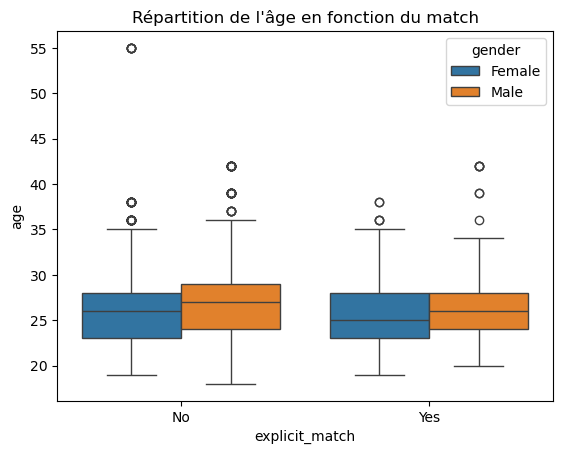

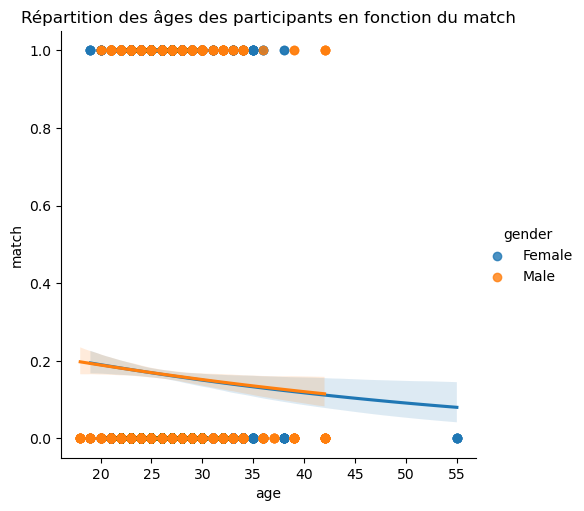

In [18]:
# Regardons la répartition des âges des hommes et des femmes en fonction du match
bx = sns.boxplot(data=dataset_copy, x='explicit_match', y='age', hue='gender')
plt.title("Répartition de l'âge en fonction du match")

sns.lmplot(x='age', y='match', hue='gender', data = dataset_copy, logistic=True)
plt.title('Répartition des âges des participants en fonction du match')

Résultats : aucune corrélation

Maintenant, regardons la différence d'âge des deux participants en fonction du match.

In [19]:
dataset_copy['diff_age'] = abs(dataset_copy['age'] - dataset_copy['age_o'])

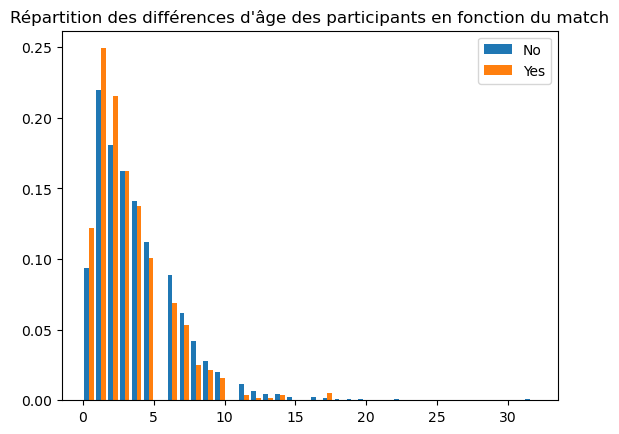

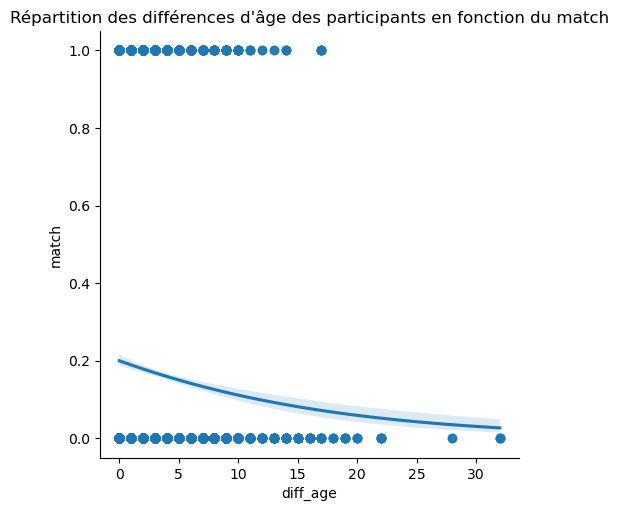

In [20]:
plt.hist([dataset_copy['diff_age'].loc[dataset_copy['explicit_match'] == 'No'], dataset_copy['diff_age'].loc[dataset_copy['explicit_match'] == 'Yes']], bins=38, density=True) # On choisit bins=38 puisque les âges vont de 18 à 55 ans.
plt.legend(['No', 'Yes'])
plt.title("Répartition des différences d'âge des participants en fonction du match")

sns.lmplot(x='diff_age', y='match', data = dataset_copy, logistic=True)
plt.title("Répartition des différences d'âge des participants en fonction du match")
plt.show()

Résultats : 

Nous pouvons observer une corrélation entre la différence d'âge et le match : plus la diifférence d'âge entre les deux participants est petite, plus il y a de chances qu'il y ait match entre les deux participants.

### Variables attr1_1 ... shar1_1 / pf_of_att ... pf_o_shar (attributs)

On va créer une dataframe de 4 colonnes : name_attribues, note, gender, match.

In [21]:
dataframe_attributs = pd.DataFrame(columns=['name_attributs', 'note', 'gender', 'match'])

In [22]:
for i in range(dataset_copy.shape[0]):
    new_row = {
        'name_attributs' : 'Attractivité',
        'note' : dataset_copy['attr1_1'][i],
        'gender' : dataset_copy['gender'][i],
        'match' : dataset_copy['explicit_match'][i]
    }
    new_df = pd.DataFrame([new_row])
    dataframe_attributs = pd.concat([dataframe_attributs, new_df], axis=0, ignore_index=True)

dataframe_attributs

C:\Users\Théo REMY\AppData\Local\Temp\ipykernel_5932\3488891291.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataframe_attributs = pd.concat([dataframe_attributs, new_df], axis=0, ignore_index=True)


,name_attributs,note,gender,match
0,Attractivité,15.0,Female,No
1,Attractivité,15.0,Female,No
2,Attractivité,15.0,Female,Yes
3,Attractivité,15.0,Female,Yes
4,Attractivité,15.0,Female,Yes
...,...,...,...,...
8373,Attractivité,70.0,Male,No
8374,Attractivité,70.0,Male,No
8375,Attractivité,70.0,Male,No
8376,Attractivité,70.0,Male,No


In [23]:
for i in range(dataset_copy.shape[0]):
    new_row = {
        'name_attributs' : 'Sincerité',
        'note' : dataset_copy['sinc1_1'][i],
        'gender' : dataset_copy['gender'][i],
        'match' : dataset_copy['explicit_match'][i]
    }
    new_df = pd.DataFrame([new_row])
    dataframe_attributs = pd.concat([dataframe_attributs, new_df], axis=0, ignore_index=True)

dataframe_attributs

,name_attributs,note,gender,match
0,Attractivité,15.0,Female,No
1,Attractivité,15.0,Female,No
2,Attractivité,15.0,Female,Yes
3,Attractivité,15.0,Female,Yes
4,Attractivité,15.0,Female,Yes
...,...,...,...,...
16751,Sincerité,0.0,Male,No
16752,Sincerité,0.0,Male,No
16753,Sincerité,0.0,Male,No
16754,Sincerité,0.0,Male,No


In [24]:
for i in range(dataset_copy.shape[0]):
    new_row = {
        'name_attributs' : 'Intelligence',
        'note' : dataset_copy['intel1_1'][i],
        'gender' : dataset_copy['gender'][i],
        'match' : dataset_copy['explicit_match'][i]
    }
    new_df = pd.DataFrame([new_row])
    dataframe_attributs = pd.concat([dataframe_attributs, new_df], axis=0, ignore_index=True)

dataframe_attributs

,name_attributs,note,gender,match
0,Attractivité,15.0,Female,No
1,Attractivité,15.0,Female,No
2,Attractivité,15.0,Female,Yes
3,Attractivité,15.0,Female,Yes
4,Attractivité,15.0,Female,Yes
...,...,...,...,...
25129,Intelligence,15.0,Male,No
25130,Intelligence,15.0,Male,No
25131,Intelligence,15.0,Male,No
25132,Intelligence,15.0,Male,No


In [25]:
for i in range(dataset_copy.shape[0]):
    new_row = {
        'name_attributs' : 'Fun',
        'note' : dataset_copy['fun1_1'][i],
        'gender' : dataset_copy['gender'][i],
        'match' : dataset_copy['explicit_match'][i]
    }
    new_df = pd.DataFrame([new_row])
    dataframe_attributs = pd.concat([dataframe_attributs, new_df], axis=0, ignore_index=True)

dataframe_attributs

,name_attributs,note,gender,match
0,Attractivité,15.0,Female,No
1,Attractivité,15.0,Female,No
2,Attractivité,15.0,Female,Yes
3,Attractivité,15.0,Female,Yes
4,Attractivité,15.0,Female,Yes
...,...,...,...,...
33507,Fun,15.0,Male,No
33508,Fun,15.0,Male,No
33509,Fun,15.0,Male,No
33510,Fun,15.0,Male,No


In [26]:
for i in range(dataset_copy.shape[0]):
    new_row = {
        'name_attributs' : 'Ambition',
        'note' : dataset_copy['amb1_1'][i],
        'gender' : dataset_copy['gender'][i],
        'match' : dataset_copy['explicit_match'][i]
    }
    new_df = pd.DataFrame([new_row])
    dataframe_attributs = pd.concat([dataframe_attributs, new_df], axis=0, ignore_index=True)

dataframe_attributs

,name_attributs,note,gender,match
0,Attractivité,15.0,Female,No
1,Attractivité,15.0,Female,No
2,Attractivité,15.0,Female,Yes
3,Attractivité,15.0,Female,Yes
4,Attractivité,15.0,Female,Yes
...,...,...,...,...
41885,Ambition,0.0,Male,No
41886,Ambition,0.0,Male,No
41887,Ambition,0.0,Male,No
41888,Ambition,0.0,Male,No


In [27]:
for i in range(dataset_copy.shape[0]):
    new_row = {
        'name_attributs' : "Centres d'intérêt partagés",
        'note' : dataset_copy['shar1_1'][i],
        'gender' : dataset_copy['gender'][i],
        'match' : dataset_copy['explicit_match'][i]
    }
    new_df = pd.DataFrame([new_row])
    dataframe_attributs = pd.concat([dataframe_attributs, new_df], axis=0, ignore_index=True)

dataframe_attributs

,name_attributs,note,gender,match
0,Attractivité,15.0,Female,No
1,Attractivité,15.0,Female,No
2,Attractivité,15.0,Female,Yes
3,Attractivité,15.0,Female,Yes
4,Attractivité,15.0,Female,Yes
...,...,...,...,...
50263,Centres d'intérêt partagés,0.0,Male,No
50264,Centres d'intérêt partagés,0.0,Male,No
50265,Centres d'intérêt partagés,0.0,Male,No
50266,Centres d'intérêt partagés,0.0,Male,No


In [28]:
dataframe_attributs.loc[dataframe_attributs['gender'] == 'Female']

,name_attributs,note,gender,match
0,Attractivité,15.0,Female,No
1,Attractivité,15.0,Female,No
2,Attractivité,15.0,Female,Yes
3,Attractivité,15.0,Female,Yes
4,Attractivité,15.0,Female,Yes
...,...,...,...,...
49779,Centres d'intérêt partagés,30.0,Female,No
49780,Centres d'intérêt partagés,30.0,Female,No
49781,Centres d'intérêt partagés,30.0,Female,No
49782,Centres d'intérêt partagés,30.0,Female,No


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Attractivité'),
  Text(1, 0, 'Sincerité'),
  Text(2, 0, 'Intelligence'),
  Text(3, 0, 'Fun'),
  Text(4, 0, 'Ambition'),
  Text(5, 0, "Centres d'intérêt partagés")])

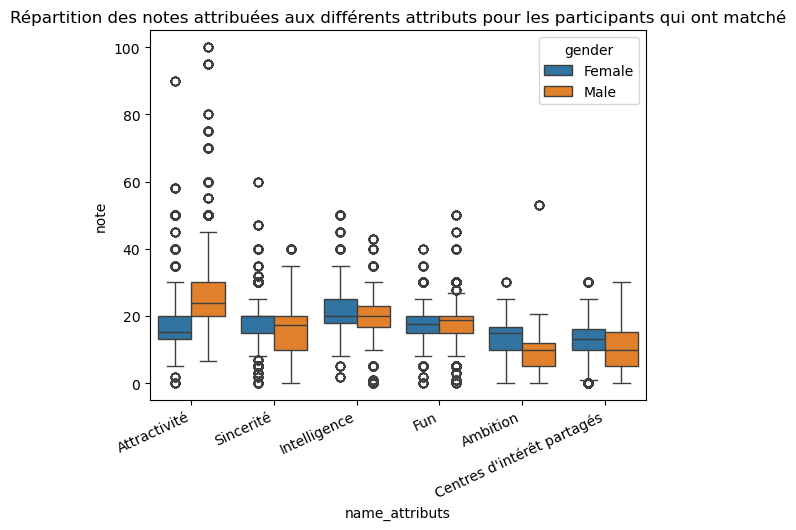

In [29]:
sns.boxplot(data=dataframe_attributs, x='name_attributs', y='note', hue='gender')
plt.title("Répartition des notes attribuées aux différents attributs pour les participants qui ont matché")
plt.xticks(rotation=25, ha='right')

In [30]:
df_moyenne = dataframe_attributs.groupby(['name_attributs', 'gender'])[['note']].mean()
df_moyenne

note
name_attributs             gender           
Ambition                   Female  12.827222
                           Male     8.552829
Attractivité               Female  18.055224
                           Male    26.921689
Centres d'intérêt partagés Female  12.704194
                           Male    10.996574
Fun                        Female  17.147292
                           Male    17.763893
Intelligence               Female  21.002502
                           Male    19.537374
Sincerité                  Female  18.305008
                           Male    16.498436

Résultats : 

on voit globalement que les hommes sont plus interessés par l'attractivité que les femmes.

A contrario, les femmes semblent plus interessées par l'ambition.

### Variable imprelig

Text(0.5, 1.0, "Répartition des notes attribuées sur l'importance de la religion en fonction du match")

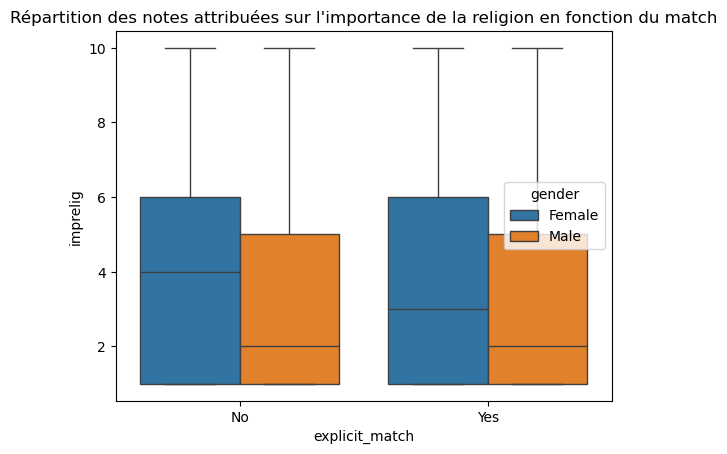

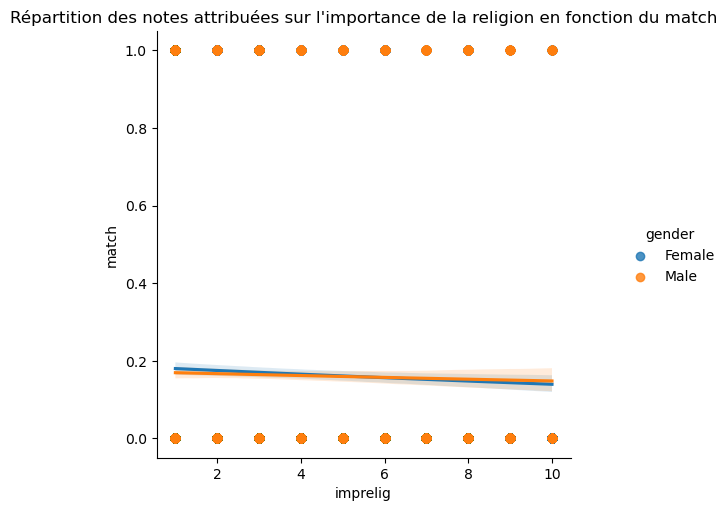

In [31]:
sns.boxplot(data=dataset_copy, x='explicit_match', y='imprelig', hue='gender')
plt.title("Répartition des notes attribuées sur l'importance de la religion en fonction du match")

sns.lmplot(x='imprelig', y='match', hue='gender', data = dataset_copy, logistic=True)
plt.title("Répartition des notes attribuées sur l'importance de la religion en fonction du match")

Résultats :

pas de corrélations.

On notera néanmoins que les femmes semblent accordées plus d'importance à la religion que les hommes.

### Variable goal

In [32]:
# On définit notre légende
name_goal = ['Seemed like a fun night out', 'To meet new people', 'To get a date', 'Looking for a serious relationship', 'To say I did it', 'Other']

In [33]:
dataset_copy['goal'].value_counts(dropna=False)

goal
1.0    3426
2.0    3012
3.0     631
5.0     510
6.0     419
4.0     301
NaN      79
Name: count, dtype: int64

In [34]:
# On enlève les lignes qui conntiennent des NaN dans la colonne "goal"
dataframe_goal = dataset_copy.copy()
dataframe_goal = dataframe_goal.query("(1 <= goal) & (goal <= 6)")

In [35]:
dataframe_goal.loc[dataframe_goal['match'] == 0]['goal'].value_counts(dropna=False)

goal
1.0    2843
2.0    2528
3.0     531
5.0     425
6.0     357
4.0     250
Name: count, dtype: int64

In [36]:
# On crée la liste de proportions des raisons de participation parmi les personnes qui n'ont pas matché
prop_no_match = dataframe_goal.loc[dataframe_goal['match'] == 0]['goal'].value_counts()/dataset_copy.loc[dataset_copy['match']==0].shape[0]

# On crée la liste de proportions des raisons de participation parmi les personnes qui ont matché
prop_match = dataframe_goal.loc[dataframe_goal['match'] == 1]['goal'].value_counts()/dataset_copy.loc[dataset_copy['match']==1].shape[0]

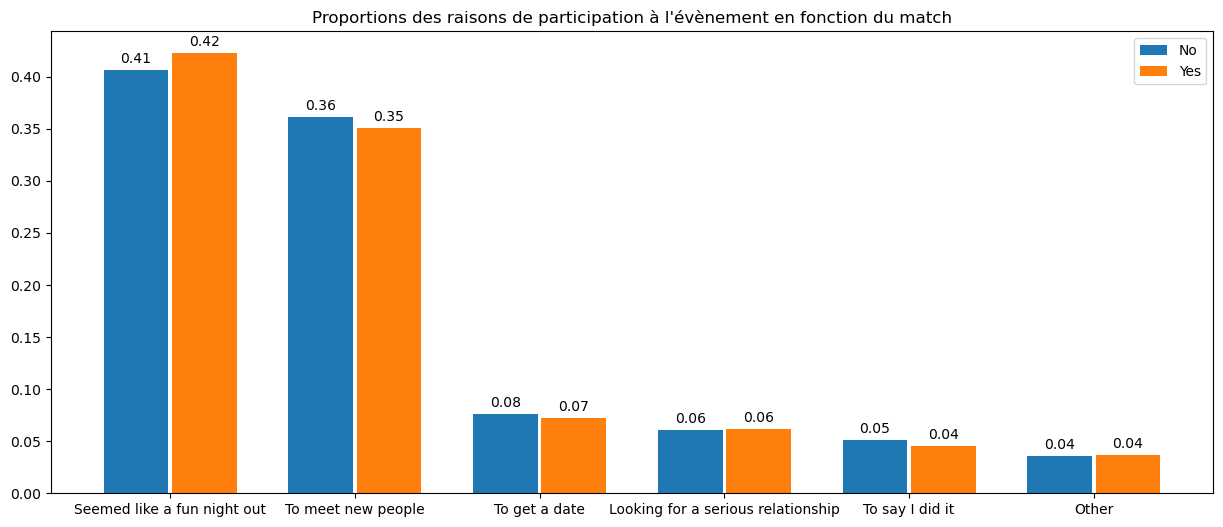

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Données pour les deux ensembles de barres
categories = name_goal
data1 = prop_no_match
data2 = prop_match

# Largeur des barres
bar_width = 0.35  # Largeur des barres
bar_spacing = 0.02  # Ecart entre les deux ensembles de barres

# Créez un tableau d'indices pour positionner les barres
x = np.arange(len(categories))

# Créez la figure et les sous-graphiques
fig, ax = plt.subplots(figsize=(15,6))

# Créez les barres pour le premier ensemble de données
bar1 = ax.bar(x - (bar_width + bar_spacing) / 2, data1, bar_width, label='No')

# Créez les barres pour le deuxième ensemble de données
bar2 = ax.bar(x + (bar_width + bar_spacing) / 2, data2, bar_width, label='Yes')

# Étiquetez les catégories sur l'axe x
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Ajoutez une légende
ax.legend()

# Ajoutez des étiquettes aux barres
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height.round(2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points au-dessus de la barre
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Afficher un titre
plt.title("Proportions des raisons de participation à l'évènement en fonction du match")

# Affichez le graphique
plt.show()


Résultats :

pas de différence pour le but de la participation entre les personnes qui ont matché et les personnes qui n'ont pas marché.

Par contre, on peut voir que la majeure partie des participants est venue pour passer une bonne soirée ou pour rencontrer de nouvelles personnes.

### Variable date

In [38]:
dataset_copy['date'].value_counts(dropna=True)

date
6.0    2094
4.0    2040
5.0    1528
7.0    1434
3.0     783
2.0     308
1.0      94
Name: count, dtype: int64

In [39]:
# On définit notre légende
name_date = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year', 'Almost never']

In [40]:
# On crée la liste de proportions des fréquences de date parmi les personnes qui n'ont pas matché
prop_no_match = dataframe_goal.loc[dataframe_goal['match'] == 0]['date'].value_counts()/dataset_copy.loc[dataset_copy['match']==0].shape[0]

# On crée la liste de proportions des fréquences de date parmi les personnes qui ont matché
prop_match = dataframe_goal.loc[dataframe_goal['match'] == 1]['date'].value_counts()/dataset_copy.loc[dataset_copy['match']==1].shape[0]

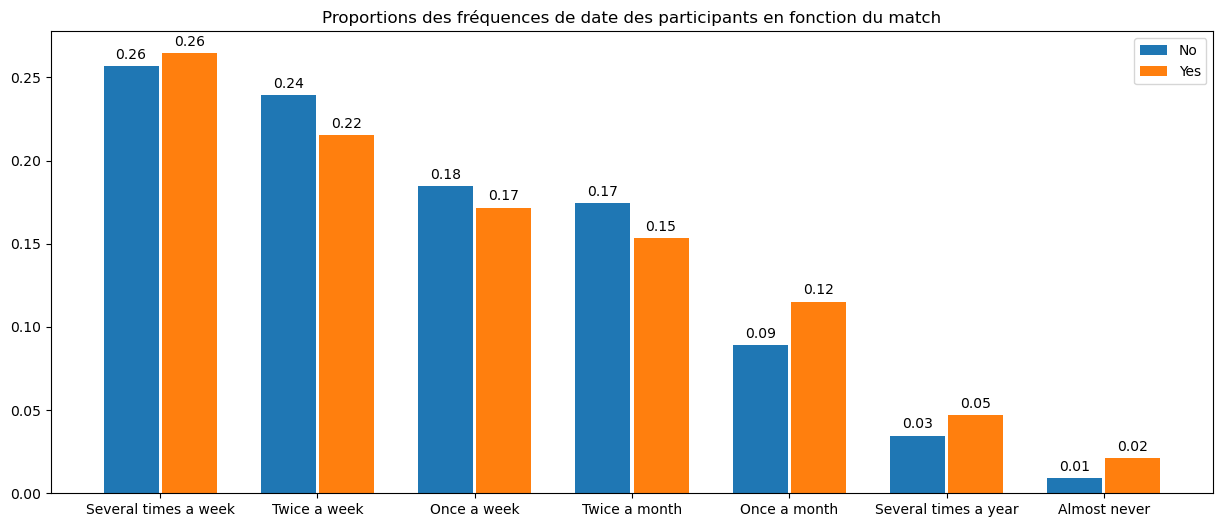

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Données pour les deux ensembles de barres
categories = name_date
data1 = prop_no_match
data2 = prop_match

# Largeur des barres
bar_width = 0.35  # Largeur des barres
bar_spacing = 0.02  # Ecart entre les deux ensembles de barres

# Créez un tableau d'indices pour positionner les barres
x = np.arange(len(categories))

# Créez la figure et les sous-graphiques
fig, ax = plt.subplots(figsize=(15,6))

# Créez les barres pour le premier ensemble de données
bar1 = ax.bar(x - (bar_width + bar_spacing) / 2, data1, bar_width, label='No')

# Créez les barres pour le deuxième ensemble de données
bar2 = ax.bar(x + (bar_width + bar_spacing) / 2, data2, bar_width, label='Yes')

# Étiquetez les catégories sur l'axe x
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Ajoutez une légende
ax.legend()

# Ajoutez des étiquettes aux barres
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height.round(2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points au-dessus de la barre
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Afficher un titre
plt.title("Proportions des fréquences de date des participants en fonction du match")

# Affichez le graphique
plt.show()

Résultats :

pas de corrélation entre la fréquence de date et le match.

### Variable go_out

In [42]:
dataset_copy['go_out'].value_counts(dropna=True)

go_out
2.0    2990
1.0    2610
3.0    1949
4.0     450
5.0     164
6.0      99
7.0      37
Name: count, dtype: int64

In [43]:
# On définit notre légende
name_goal = ['Several times a week', 'Twice a week', 'Once a week', 'Twice a month', 'Once a month', 'Several times a year', 'Almost never']

In [44]:
# On crée la liste de proportions des fréquences de date parmi les personnes qui n'ont pas matché
prop_no_match = dataframe_goal.loc[dataframe_goal['match'] == 0]['go_out'].value_counts()/dataset_copy.loc[dataset_copy['match']==0].shape[0]

# On crée la liste de proportions des fréquences de date parmi les personnes qui ont matché
prop_match = dataframe_goal.loc[dataframe_goal['match'] == 1]['go_out'].value_counts()/dataset_copy.loc[dataset_copy['match']==1].shape[0]

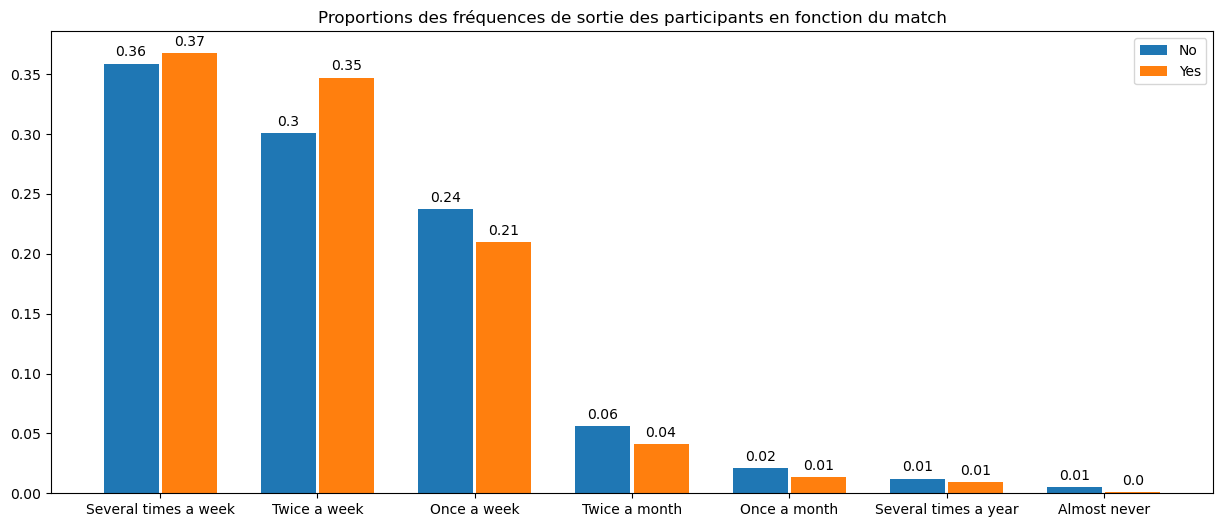

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Données pour les deux ensembles de barres
categories = name_goal
data1 = prop_no_match
data2 = prop_match

# Largeur des barres
bar_width = 0.35  # Largeur des barres
bar_spacing = 0.02  # Ecart entre les deux ensembles de barres

# Créez un tableau d'indices pour positionner les barres
x = np.arange(len(categories))

# Créez la figure et les sous-graphiques
fig, ax = plt.subplots(figsize=(15,6))

# Créez les barres pour le premier ensemble de données
bar1 = ax.bar(x - (bar_width + bar_spacing) / 2, data1, bar_width, label='No')

# Créez les barres pour le deuxième ensemble de données
bar2 = ax.bar(x + (bar_width + bar_spacing) / 2, data2, bar_width, label='Yes')

# Étiquetez les catégories sur l'axe x
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Ajoutez une légende
ax.legend()

# Ajoutez des étiquettes aux barres
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height.round(2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points au-dessus de la barre
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Afficher un titre
plt.title("Proportions des fréquences de sortie des participants en fonction du match")

# Affichez le graphique
plt.show()

Text(0.5, 1.0, "Répartition des différences d'âge des participants en fonction du match")

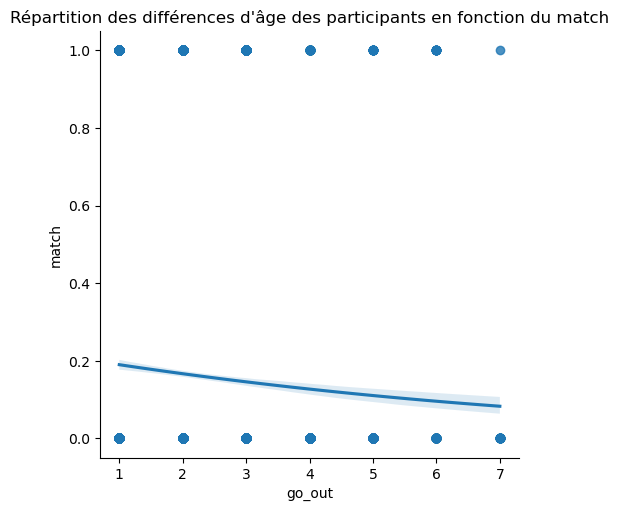

In [46]:
sns.lmplot(x='go_out', y='match', data = dataset_copy, logistic=True)
plt.title("Répartition des différences d'âge des participants en fonction du match")

Résultats :
d'après le graphique, les partipants qui sortent plusieurs fois par semaine et 2 fois par semaine ont plus de chances de matché que les autres (72% contre 66%).

### Variables sports ... yoga (centres d'intérêt)

In [47]:
dataset_copy.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,explicit_match,diff_age
0,1,1.0,Female,1,1,1,10,7,NaN,4,1,11.0,0,0.14,No,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,No,6.0
1,1,1.0,Female,1,1,1,10,7,NaN,3,2,12.0,0,0.54,No,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,No,1.0
2,1,1.0,Female,1,1,1,10,7,NaN,10,3,13.0,1,0.16,Yes,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,1.0
3,1,1.0,Female,1,1,1,10,7,NaN,5,4

In [48]:
dataframe_interet = dataset_copy[['match', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']]
dataframe_interet.head()

,match,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
1,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
3,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
4,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0


In [49]:
# Faisons une matrice de corrélation sur dataframe_interet
dataframe_interet.corr()

,match,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
match,1.000000,0.021666,-0.004472,0.009470,0.033912,0.014954,0.031545,0.024143,0.013543,0.055435,0.020222,-0.014542,0.000087,-0.022989,0.027034,0.023093,-0.001333,0.036601
sports,0.021666,1.000000,0.479965,0.396333,-0.064060,-0.126004,-0.126624,0.177109,0.128643,0.049860,-0.141269,-0.097176,-0.252943,-0.154180,-0.015553,0.003097,-0.104038,-0.030816
tvsports,-0.004472,0.479965,1.000000,0.227852,-0.054278,-0.080104,-0.098732,-0.012371,0.254329,0.084676,-0.157089,0.255389,-0.088705,-0.020688,0.051440,0.058985,0.039979,-0.065364
exercise,0.009470,0.396333,0.227852,1.000000,0.085143,-0.007210,-0.014675,0.069015,0.007194,0.015275,0.007122,0.026171,-0.013915,-0.054629,-0.052006,0.003749,0.084926,0.111794
dining,0.033912,-0.064060,-0.054278,0.085143,1.000000,0.386673,0.341537,0.077145,0.061606,0.231037,0.104700,0.111967,0.305682,0.231736,0.218690,0.197483,0.406903,0.174802
museums,0.014954,-0.126004,-0.080104,-0.007210,0.386673,1.000000,0.858548,0.180012,-0.078094,0.114430,0.327652,0.026396,0.549573,0.318911,0.379148,0.271989,0.228897,0.261824
art,0.031545,-0.126624,-0.098732,-0.014675,0.341537,0.858548,1.000000,0.192367,-0.064945,0.134655,0.238423,0.018157,0.527193,0.315453,0.404713,0.293376,0.218072,0.304782
hiking,0.024143,0.177109,-0.012371,0.069015,0.077145,0.180012,0.192367,1.000000,0.157343,0.013731,0.042377,-0.147967,0.073997,0.015730,0.182721,0.048489,-0.115085,0.237838
gaming,0.013543,0.128643,0.254329,0.007194,0.061606,-0.078094,-0.064945,0.157343,1.000000,0.190855,-0.062705,0.199103,-0.040095,0.015783,0.098806,0.043301,0.093467,-0.011736
clubbing,0.055435,0.049860,0.084676,0.015275,0.231037,0.114430,0.134655,0.013731,0.190855,1.000000,-0.085992,0.016893,0.121981,0.116957,0.125435,0.123750,0.196580,0.073370


Ici, seule la première ligne de la matrice nous intéresse. A ce qu'on l'on voit, il n'y a aucune corrélation entre n'importe lequel des centres d'intêret et le match.

### Variable met

In [50]:
dataset_copy[['met']].value_counts(dropna=True)

met
0.0    4047
2.0    3597
1.0     351
7.0       3
5.0       2
3.0       1
6.0       1
8.0       1
Name: count, dtype: int64

Données incohérentes avec le guide de variables. 
S'il était possible, j'aurai contacté le Data Manager pour comprendre le codage de cette variable et proposer un recodage binaire (chose impossible ici).

## Conclusion

Peu de variables testées dans le compte-rendu révèlent un impact réel sur le match.
Néanmoins, nous pouvons noter deux choses :
- les personnes dont la différence d'âge est faible ont plus de chances de matché que si elles avaient une grande différence d'âge
- les personnes qui sortent souvent en semaine ont plus de chances de matché que celle qui ne sortent pas souvent

Nous conclurons par le fait que nous ne pouvons pas faire de réelles prédictions sur l'amour. Cette notion est subjective et ne peut être modélisée.